In [2]:
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.image as mpimg
import cv2
import mediapipe as mp
import os
import subprocess
import requests


# Filtering  Dataset

In [30]:
def plot_images(image_paths, titles):
    num_images = len(image_paths)
    
    if num_images != len(titles):
        print("Jumlah gambar tidak sesuai dengan jumlah judul.")
        return
    
    max_cols = 4
    num_rows = (num_images + max_cols - 1) // max_cols
    
    plt.figure(figsize=(15, 5 * num_rows))
    
    for i in range(num_images):
        plt.subplot(num_rows, max_cols, i + 1)
        img = mpimg.imread(image_paths[i])
        plt.imshow(img)
        plt.title(titles[i])
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

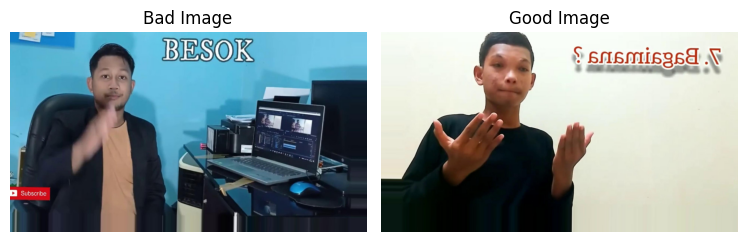

In [12]:
bad_img_path = "./sample/bad.jpg"
good_img_path = "./sample/good.jpg"

image_paths = [bad_img_path, good_img_path]
titles = ['Bad Image', 'Good Image']

plot_images(image_paths, titles)

c:\Users\ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


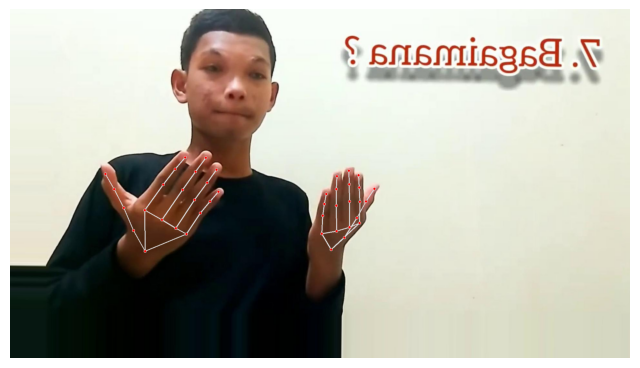

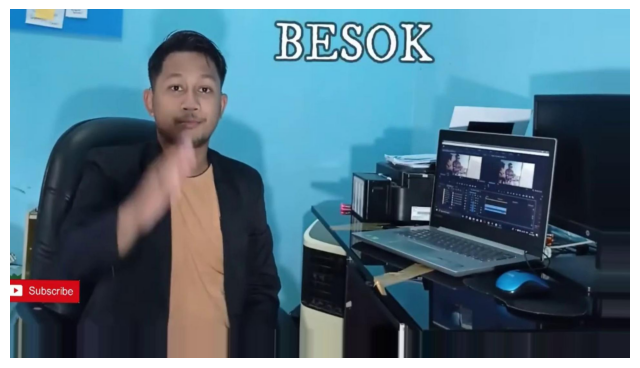

In [13]:
def detect_hand_landmarks(image_path):
    # Load model
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
    mp_drawing = mp.solutions.drawing_utils
    
    # Load image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Process image
    results = hands.process(image_rgb)
    
    # Draw landmarks
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    
    # Convert image from BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Show image with landmarks using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    
# Contoh penggunaan
detect_hand_landmarks(good_img_path)
detect_hand_landmarks(bad_img_path)

In [14]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

hand_notfound_images = []
# For static images:
directory = "./sultani-augmented-dataset/Tidur/"
output_directory = "./sultani-annotated-dataset/Tidur"

os.makedirs(output_directory, exist_ok=True)

IMAGE_FILES = [directory + f for f in os.listdir(directory) if f.endswith(".jpg")]

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5,
    # min_tracking_confidence=0.5,
) as hands:

    for idx, file in enumerate(IMAGE_FILES):
        filename = file.split("/")[-1].split(".")[0]
        print(filename)
        print(file)
        image = cv2.flip(cv2.imread(file), 1)
        # Convert the BGR image to RGB before processing.
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        # print('Handedness:', results.multi_handedness)

        if not results.multi_hand_landmarks:
            hand_notfound_images.append(file)
            continue
        image_height, image_width, _ = image.shape
        annotated_image = image.copy()
        output_file = os.path.join(output_directory, f"annotated_{filename}.jpg")

        for hand_landmarks in results.multi_hand_landmarks:
        #   print('hand_landmarks:', hand_landmarks)
        #   print(
        #       f'Index finger tip coordinates: (',
        #       f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x},'
        #       f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y})'
        #       f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
        #       f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
        #   )

            mp_drawing.draw_landmarks(
                annotated_image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

        cv2.imwrite(output_file, cv2.flip(annotated_image, 1))
        # cv2.imwrite('./tmp/annotated_' + filename + '.png', cv2.flip(annotated_image, 1))

        # Draw hand world landmarks.
        # if not results.multi_hand_world_landmarks:
        #   continue
        # for hand_world_landmarks in results.multi_hand_world_landmarks:
        #   mp_drawing.plot_landmarks(
        #     hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

aug-0_0_Tidur_1
./sultani-augmented-dataset/Tidur/aug-0_0_Tidur_1.jpg
aug-0_0_Tidur_10
./sultani-augmented-dataset/Tidur/aug-0_0_Tidur_10.jpg
aug-0_0_Tidur_11
./sultani-augmented-dataset/Tidur/aug-0_0_Tidur_11.jpg
aug-0_0_Tidur_12
./sultani-augmented-dataset/Tidur/aug-0_0_Tidur_12.jpg
aug-0_0_Tidur_13
./sultani-augmented-dataset/Tidur/aug-0_0_Tidur_13.jpg
aug-0_0_Tidur_14
./sultani-augmented-dataset/Tidur/aug-0_0_Tidur_14.jpg
aug-0_0_Tidur_15
./sultani-augmented-dataset/Tidur/aug-0_0_Tidur_15.jpg
aug-0_0_Tidur_16
./sultani-augmented-dataset/Tidur/aug-0_0_Tidur_16.jpg
aug-0_0_Tidur_17
./sultani-augmented-dataset/Tidur/aug-0_0_Tidur_17.jpg
aug-0_0_Tidur_18
./sultani-augmented-dataset/Tidur/aug-0_0_Tidur_18.jpg
aug-0_0_Tidur_19
./sultani-augmented-dataset/Tidur/aug-0_0_Tidur_19.jpg
aug-0_0_Tidur_2
./sultani-augmented-dataset/Tidur/aug-0_0_Tidur_2.jpg
aug-0_0_Tidur_20
./sultani-augmented-dataset/Tidur/aug-0_0_Tidur_20.jpg
aug-0_0_Tidur_3
./sultani-augmented-dataset/Tidur/aug-0_0_Tidur_3.jp

In [26]:
def process_images(image_files, annotated_dir):
    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles
    mp_hands = mp.solutions.hands

    hand_notfound_images = []

    with mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=2,
        min_detection_confidence=0.5,
        # min_tracking_confidence=0.5,
    ) as hands:

        for idx, file in enumerate(image_files):
            filename = file.split("\\")[-1].split(".")[0]
            class_name = filename.split("_")[-2]
            print(f"filename => {filename}")
            print(f"class_name => {class_name}")
            done_list = os.listdir("sultani-annotated-dataset-done/")[:-1]

            if class_name in done_list:
                continue

            image = cv2.flip(cv2.imread(file), 1)
            # Convert the BGR image to RGB before processing.
            results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            # print('Handedness:', results.multi_handedness)

            if not results.multi_hand_landmarks:
                hand_notfound_images.append(file)
                continue
            image_height, image_width, _ = image.shape
            annotated_image = image.copy()

            for hand_landmarks in results.multi_hand_landmarks:
                #   print('hand_landmarks:', hand_landmarks)
                #   print(
                #       f'Index finger tip coordinates: (',
                #       f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
                #       f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
                #   )

                mp_drawing.draw_landmarks(
                    annotated_image,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style(),
                )

            class_name = file.split("\\")[-2]
            output_path = os.path.join(annotated_dir + "-done", class_name)
            if not os.path.exists(output_path):
                os.makedirs(output_path)

            annotated_img_path = os.path.join(output_path, f"annotated_{filename}.png")
            print(f"annotatted => {annotated_img_path}")
            cv2.imwrite(annotated_img_path, cv2.flip(annotated_image, 1))

            # Draw hand world landmarks.
            # if not results.multi_hand_world_landmarks:
            #   continue
            # for hand_world_landmarks in results.multi_hand_world_landmarks:
            #   mp_drawing.plot_landmarks(
            #     hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)
            # break

    return hand_notfound_images


def list_images(directory):
    return [
        os.path.join(root, f)
        for root, _, files in os.walk(directory)
        for f in files
        if f.lower().endswith((".jpg", ".png"))
    ]

# Find Bad Image (Hand not Detected)

In [27]:
ANNOTATED_DIR = './sultani-annotated-dataset'
IMAGE_FILES = list_images('./sultani-augmented-dataset')
hands_notfound = process_images(IMAGE_FILES, ANNOTATED_DIR)
print(len(hands_notfound))

filename => aug-0_0_Apa_12
class_name => Apa
class_name => Apa
annotatted => ./sultani-annotated-dataset-done\Apa\annotated_aug-0_0_Apa_12.png
filename => aug-0_0_Apa_14
class_name => Apa
class_name => Apa
annotatted => ./sultani-annotated-dataset-done\Apa\annotated_aug-0_0_Apa_14.png
filename => aug-0_0_Apa_16
class_name => Apa


c:\Users\ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


class_name => Apa
annotatted => ./sultani-annotated-dataset-done\Apa\annotated_aug-0_0_Apa_16.png
filename => aug-0_0_Apa_20
class_name => Apa
class_name => Apa
annotatted => ./sultani-annotated-dataset-done\Apa\annotated_aug-0_0_Apa_20.png
filename => aug-0_0_Apa_34
class_name => Apa
class_name => Apa
annotatted => ./sultani-annotated-dataset-done\Apa\annotated_aug-0_0_Apa_34.png
filename => aug-0_0_Apa_36
class_name => Apa
class_name => Apa
annotatted => ./sultani-annotated-dataset-done\Apa\annotated_aug-0_0_Apa_36.png
filename => aug-0_0_Apa_38
class_name => Apa
class_name => Apa
annotatted => ./sultani-annotated-dataset-done\Apa\annotated_aug-0_0_Apa_38.png
filename => aug-0_0_Apa_44
class_name => Apa
class_name => Apa
annotatted => ./sultani-annotated-dataset-done\Apa\annotated_aug-0_0_Apa_44.png
filename => aug-0_0_Apa_45
class_name => Apa
class_name => Apa
annotatted => ./sultani-annotated-dataset-done\Apa\annotated_aug-0_0_Apa_45.png
filename => aug-0_0_Apa_6
class_name => Apa


# Sample bad Image

In [32]:
print(hands_notfound)

['./sultani-augmented-dataset\\Halo\\aug-0_0_Halo_12.jpg', './sultani-augmented-dataset\\Halo\\aug-0_0_Halo_13.jpg', './sultani-augmented-dataset\\Halo\\aug-0_10_Halo_13.jpg', './sultani-augmented-dataset\\Halo\\aug-0_12_Halo_13.jpg', './sultani-augmented-dataset\\Halo\\aug-0_1_Halo_12.jpg', './sultani-augmented-dataset\\Halo\\aug-0_1_Halo_13.jpg', './sultani-augmented-dataset\\Halo\\aug-0_2_Halo_12.jpg', './sultani-augmented-dataset\\Halo\\aug-0_2_Halo_13.jpg', './sultani-augmented-dataset\\Halo\\aug-0_3_Halo_12.jpg', './sultani-augmented-dataset\\Halo\\aug-0_3_Halo_13.jpg', './sultani-augmented-dataset\\Halo\\aug-0_4_Halo_12.jpg', './sultani-augmented-dataset\\Halo\\aug-0_4_Halo_13.jpg', './sultani-augmented-dataset\\Halo\\aug-0_5_Halo_12.jpg', './sultani-augmented-dataset\\Halo\\aug-0_5_Halo_13.jpg', './sultani-augmented-dataset\\Halo\\aug-0_66_Halo_12.jpg', './sultani-augmented-dataset\\Halo\\aug-0_67_Halo_12.jpg', './sultani-augmented-dataset\\Halo\\aug-0_67_Halo_13.jpg', './sulta

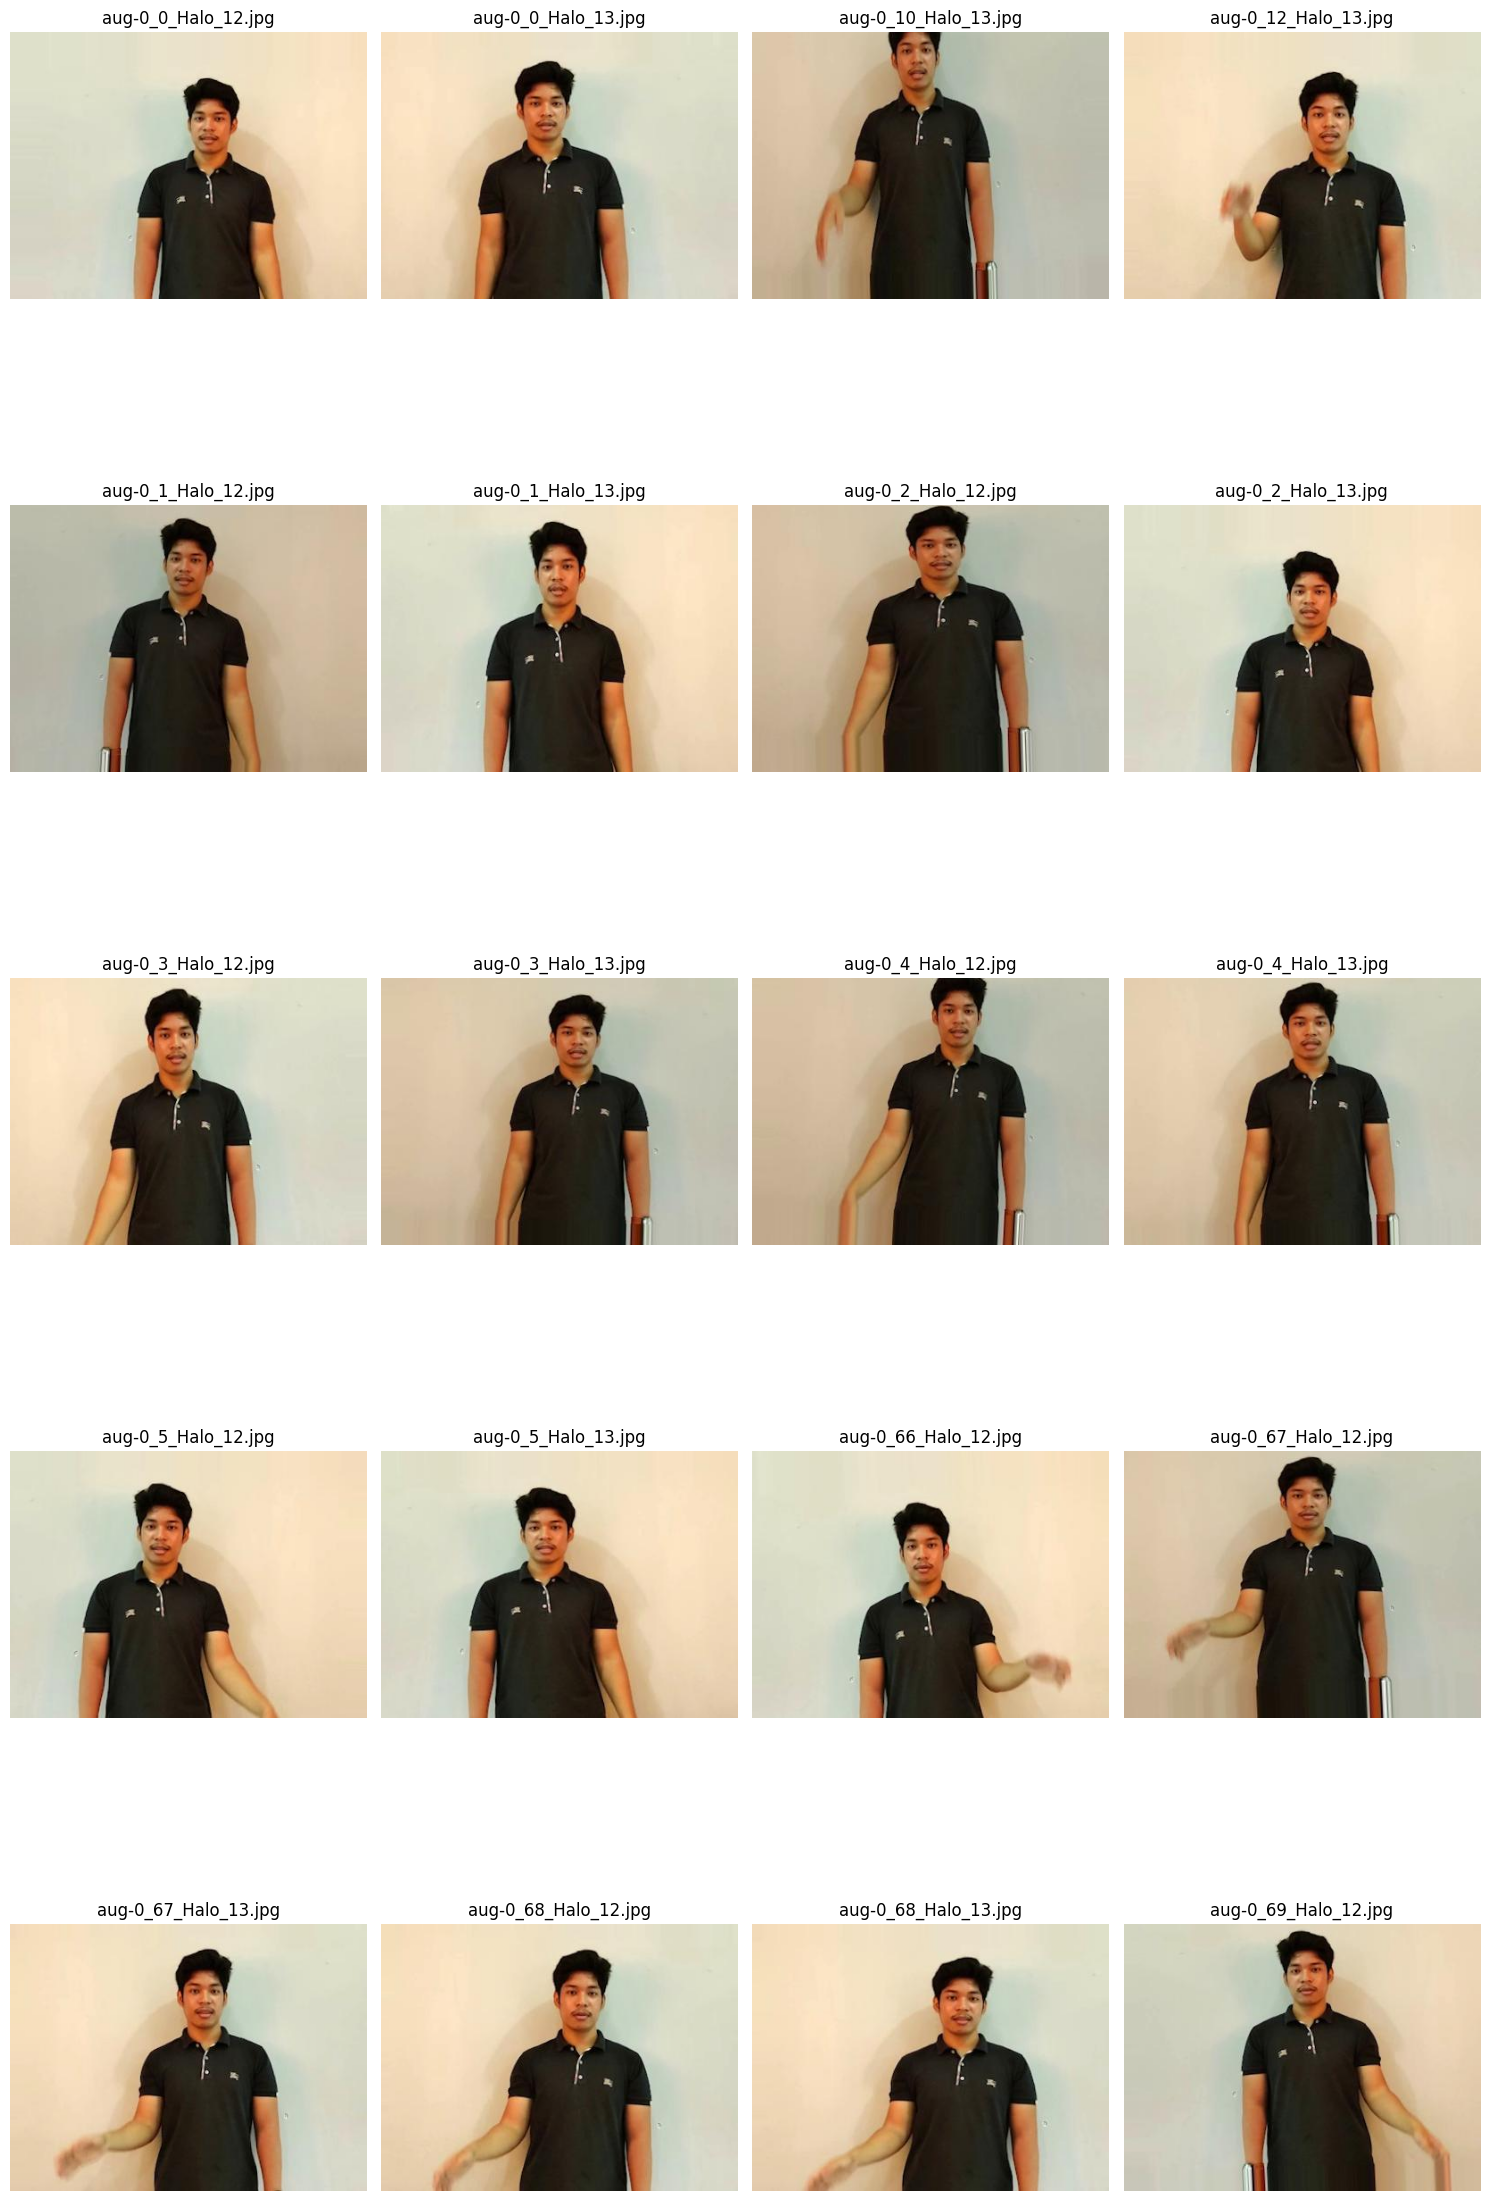

In [35]:
plot_images(hands_notfound[:20], [img.split('\\')[-1] for img in hands_notfound[:20]])

# Delete All Bad Image

In [36]:
def delete_images(image_paths):
    for image_path in image_paths:
        try:
            os.remove(image_path)
            print(f"File {image_path} berhasil dihapus.")
        except OSError as e:
            print(f"Error saat menghapus file {image_path}: {e.strerror}")
            
            
delete_images(hands_notfound)

File ./sultani-augmented-dataset\Halo\aug-0_0_Halo_12.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-0_0_Halo_13.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-0_10_Halo_13.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-0_12_Halo_13.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-0_1_Halo_12.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-0_1_Halo_13.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-0_2_Halo_12.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-0_2_Halo_13.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-0_3_Halo_12.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-0_3_Halo_13.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-0_4_Halo_12.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-0_4_Halo_13.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-0_5_Halo_12.jpg berhasil dihapus.
File ./sul

# Preview Hasil setelah Explore

In [42]:
def count_file(directory):
    file_count_per_class = {}
    total_files = 0

    for root, dirs, files in os.walk(directory):
        class_name = root.split(os.sep)[-1]
        count = sum(1 for file in files if file.endswith(".png") or file.endswith(".jpg"))
        
        if count > 0:
            file_count_per_class[class_name] = count
            total_files += count

    for class_name, count in file_count_per_class.items():
        print(f"{class_name}: {count}")

    print(f"Total Dataset: {total_files}")
    
count_file('sultani-augmented-dataset')

Total Dataset: 0


In [39]:
import os
import random

def get_random_files(root_dir, num_samples):
    file_paths = []
    
    # Fungsi rekursif untuk mencari semua file dalam direktori dan subdirektorinya
    def get_all_files(directory):
        for dirpath, _, filenames in os.walk(directory):
            for filename in filenames:
                file_paths.append(os.path.join(dirpath, filename))

    get_all_files(root_dir)
    
    # Mengambil sampel secara acak dari file_paths
    if num_samples >= len(file_paths):
        return file_paths
    else:
        return random.sample(file_paths, num_samples)

# Contoh penggunaan
directory = ANNOTATED_DIR
num_samples = 5
sample_files = get_random_files(directory, num_samples)
for file_path in sample_files:
    print(file_path)

./sultani-annotated-dataset\Baik\annotated_aug-6_11_Baik_21.png
./sultani-annotated-dataset\Kemana\annotated_aug-6_9_Kemana_19.jpg
./sultani-annotated-dataset\Baik\annotated_aug-8_9_Baik_21.png
./sultani-annotated-dataset\Baik\annotated_aug-7_15_Baik_43.jpg
./sultani-annotated-dataset\Siapa\annotated_aug-8_13_Siapa_7.png


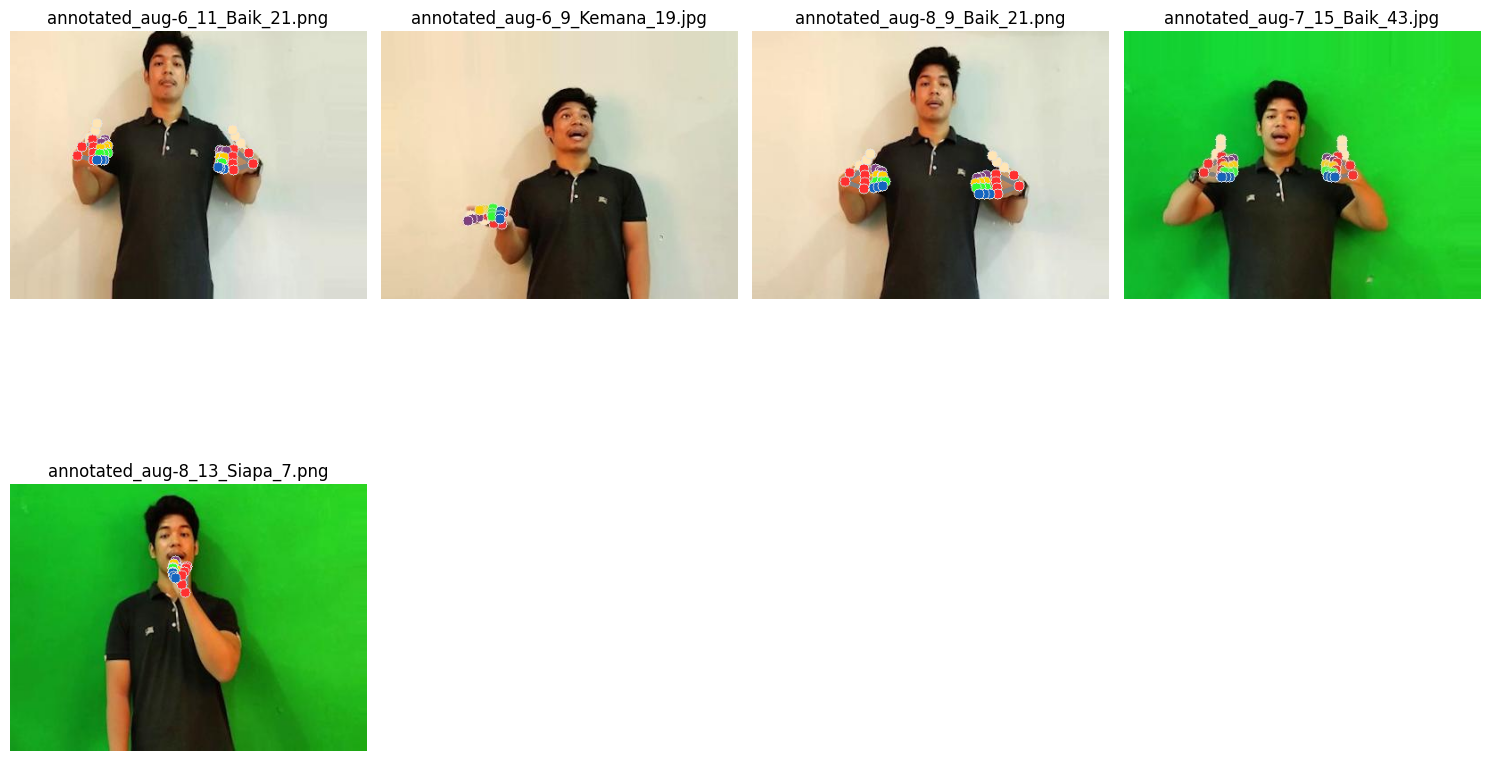

In [40]:
plot_images(sample_files, [img.split('\\')[-1] for img in sample_files])

In [57]:
def delete_augmented_image_not_in_annotated(annotated_dir, augmented_dir):
    annotated_files = set(list_images(annotated_dir))
    augmented_files = set(list_images(augmented_dir))

    # Only get the file name for annotated file
    annotated_files = [os.path.basename(file) for file in annotated_files]

    count = 0
    for file in augmented_files:
        # check if the file is not in annotated_files
        # first add prefix 'annotated_' to the file name
        prefixed_file = "annotated_" + os.path.basename(file)

        if prefixed_file not in annotated_files:
            os.remove(file)
            print(f"File {file} berhasil dihapus.")
            count += 1
    
    print(f"Total file yang dihapus: {count}")

ANNOTATED_DIR = './sultani-annotated-dataset'
AUGMENTED_DIR = './sultani-augmented-dataset'

delete_augmented_image_not_in_annotated(ANNOTATED_DIR, AUGMENTED_DIR)

File ./sultani-augmented-dataset\Halo\aug-8_75_Halo_12.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-7_4_Halo_12.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-9_2_Halo_13.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-1_9_Halo_13.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-9_4_Halo_12.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-0_70_Halo_13.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-0_72_Halo_13.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-7_2_Halo_12.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Kapan\aug-7_6_Kapan_3.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-0_75_Halo_12.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-4_9_Halo_13.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Siapa\aug-7_37_Siapa_12.jpg berhasil dihapus.
File ./sultani-augmented-dataset\Halo\aug-1_77_Halo_12.jpg berhasil dihapus.
Fil